[0.99434946 0.96569392 0.93633116 0.90621157 0.87528735 0.84351856]
[0.99475754 0.96825897 0.94127257 0.91378899 0.88580942 0.85735253]
[0.99210447 0.95151368 0.90877788 0.86337293 0.81452122 0.7609774 ]


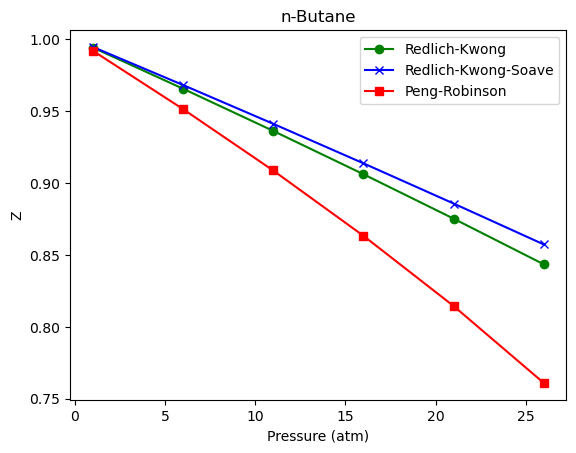

In [22]:
from scipy.optimize import fsolve
import numpy as np
import pylab as plt

# n-butane Redlich-Kwong, Eq. (2.5)
def specvolRK(v, p):
    # in K, atm, l/gmol    
    # for n-butane     
    Tc = 425.2    
    pc = 37.5    
    T = 500   
    R = 0.08206     
    aRK = 0.42748 * (R * Tc) ** 2 / pc    
    aRK = aRK * (Tc / T) ** 0.5  
    bRK = 0.08664 * (R * Tc / pc)    
    return p * v ** 3 - R * T * v ** 2 + (aRK - p * bRK ** 2 - R * T * bRK) * v - aRK * bRK


# n-butane Redlich-Kwong-Soave, Eq. (2.5)
def specvolRKS(v, p):
    # in K, atm, l/gmol  
    # for n-butane
    Tc = 425.2 
    pc = 37.5    
    T = 500    
    R = 0.08206    
    acentric = 0.193     
    mRKS = 0.480 + (1.574 - 0.176*acentric)*acentric     
    alphaRKS = (1 + mRKS *(1-(T/Tc)**0.5)) ** 2    
    aRKS = 0.42748 * alphaRKS * (R * Tc) ** 2 / pc   
    bRKS = 0.08664 * (R * Tc / pc)  
    return p * v ** 3 - R * T * v ** 2 + (aRKS - p * bRKS ** 2 - R * T * bRKS) * v - aRKS * bRKS

# n-butane Peng-Robinson, Eq. (2.6)
def specvolPR(v, p):
    # in K, atm, l/gmol   
    # for n-butane     
    Tc = 425.2     
    pc = 37.5   
    T = 500    
    R = 0.08206   
    acentric = 0.193  
    mPR = 0.37363 + (1.54226 - 0.26992*acentric)*acentric    
    alphaPR = (1 + mPR *(1-(T/Tc)**0.5)) ** 2     
    aPR = 0.45724 * alphaPR * (R * Tc) ** 2 / pc    
    bPR = 0.07780 * (R * Tc / pc)    
    return p*v**3+(bPR*p - R*T)*v**2+(aPR- p*bPR**2- R*T*bPR)*v + (p*bPR**3 + R*T*bPR**2-aPR*bPR) 


T = 500
R = 0.08206
pressure = np.arange(1, 27, 5)
zcompRK = np.zeros(6, dtype=float)
zcompRKS = np.zeros(6, dtype=float)
zcompPR = np.zeros(6, dtype=float)

for i in range(0, 6, 1):
    p = pressure[i]
    guess = R * T / p
    v = fsolve(specvolRK, guess, p)
    z = p * v / (R * T)
    zcompRK[i] = z
    v = fsolve(specvolRKS, v, p)
    z = p * v / (R * T)
    zcompRKS[i] = z
    v = fsolve(specvolPR, v, p)
    z = p * v / (R * T)
    zcompPR[i] = z

print(zcompRK)
print(zcompRKS)
print(zcompPR)

plt.plot(pressure, zcompRK, 'o-g', label='Redlich-Kwong')
plt.plot(pressure, zcompRKS, 'x-b', label='Redlich-Kwong-Soave')
plt.plot(pressure, zcompPR, 's-r', label='Peng-Robinson')
plt.legend(loc='best')
plt.xlabel('Pressure (atm)')
plt.ylabel('Z')
plt.title('n-Butane')
plt.show()